Построить алгоритм метода престрелки

$\left\{ 
    \begin{gathered}
        y'' - x \sqrt{y} = 0,\quad 0 \geqslant x \geqslant 1\\ 
        y(0) = 0, y(1) = 2 \\ 
    \end{gathered}
\right.$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
x0 = 0
x1 = 1
y0 = 0
y1 = 2


N = 10000
h = (x1 - x0) / N
eps = 1e-4

In [22]:
def f(x, y):
    return np.sqrt(y) * x

def sm(alpha, points: bool = False):
    xn = x0
    yn = y0
    vn = alpha
    yn_array = [yn]
    while xn < x1:
        yn, vn = iterate(xn, yn, vn)
        xn += h
        if points:
            yn_array.append(yn)
    if points:
        return yn_array
    return yn

In [23]:
def iterate(xn, yn, vn):
    y_es = yn + h * vn
    f1 = f(xn, yn)
    f2 = f(xn + h, yn + h * f1)
    v_es = vn + (h / 2) * (f1 + f2)
    return y_es, v_es

In [24]:
al_1 = 2
al_2 = 1
al = (al_1 + al_2)/2


while abs(sm(al) - y1) > eps:
    if sm(al) - y1 > 0:
        al_1 = al
    else:
        al_2 = al
    al = (al_1 + al_2)/2
    yn_points = sm(al, points=True)

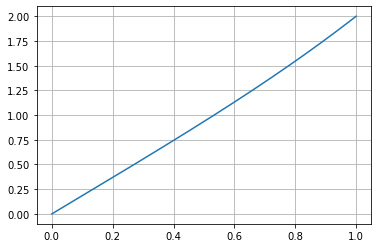

In [25]:
plt.plot(np.linspace(0, 1, len(yn_points)), yn_points)
plt.grid()
plt.show()
